ログからorderingとconsensusの時間を計測しjson型にまとめる

In [6]:
import csv

def make_consensus_event_diff(participant_size, message_size, netwoek_delay, is_booth_change, vehicle_speed):
    booth_size = participant_size

    # result_csv_folder = "./results/n" + str(participant_size) + "/boo"  + str(booth_size) + "/m" + str(message_size) + "/d" + str(network_delay) + "/"
    
    if is_booth_change:
        result_csv_folder = "./results/booth_change/vs" + str(vehicle_speed) + "/n" + str(participant_size) + "/m" + str(message_size) + "/d" + str(netwoek_delay) + "/"
    else:
        result_csv_folder = "./results/booth_change/n" + str(participant_size) + "/m" + str(message_size) + "/d" + str(netwoek_delay) + "/"


    # CSVファイルからデータを読み込む
    data = []
    with open(result_csv_folder + "consensus_event.csv", 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            data.append(row)



    # id0のstart_timeを基準として差分を計算
    # delete data[0] as it is header
    del data[0]
    id0_start_time = int(data[0][1])
    result = []
    for row in data:
        if row[1] == "null" or row[2] == "null":
            continue
        id = int(row[0])
        start_time = int(row[1])
        end_time = int(row[2])
        duration = int(row[3])
        len_block_range = int(row[4])
        result.append([id, start_time - id0_start_time, end_time - id0_start_time, duration, len_block_range])

    # データの1,2,3列目を1000で割り、少数点第三位で四捨五入する。resultを直接変更する
    for row in result:
        row[1] = round(row[1] / 1000, 2)
        row[2] = round(row[2] / 1000, 2)
        row[3] = round(row[2] - row[1], 2)
            
    # 結果を出力
    with open(result_csv_folder + "consensus_event_diff.csv", 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["id", "start_time", "end_time", "duration", "len_block_range"])
        for row in result:
            writer.writerow(row)

is_booth_change = True
vehicle_speed = 70
participant_size_list = [310]
message_size = 32
network_delay = 10

for participant_size in participant_size_list:
    make_consensus_event_diff(participant_size, message_size, network_delay, is_booth_change, vehicle_speed)

no booth member change statics

participant_size:  4
sum_duration:  10541
sum_len_block_range:  10000
num_block:  10000
average_duration:  1.0541

FileNotFoundError:  ./results/n5/boo5/m32/d10/consensus_event.csv
participant_size:  6
sum_duration:  72676
sum_len_block_range:  9581
num_block:  9581
average_duration:  7.585429495877257

FileNotFoundError:  ./results/n7/boo7/m32/d10/consensus_event.csv
participant_size:  8
sum_duration:  17089
sum_len_block_range:  9362
num_block:  9362
average_duration:  1.8253578295236061

FileNotFoundError:  ./results/n9/boo9/m32/d10/consensus_event.csv
participant_size:  10
sum_duration:  24988
sum_len_block_range:  9525
num_block:  9525
average_duration:  2.6234120734908135

FileNotFoundError:  ./results/n11/boo11/m32/d10/consensus_event.csv
participant_size:  12
sum_duration:  35371
sum_len_block_range:  8747
num_block:  8747
average_duration:  4.043786441065508

FileNotFoundError:  ./results/n13/boo13/m32/d10/consensus_event.csv
participant_size:  14
sum_duration:  38998
sum_len_

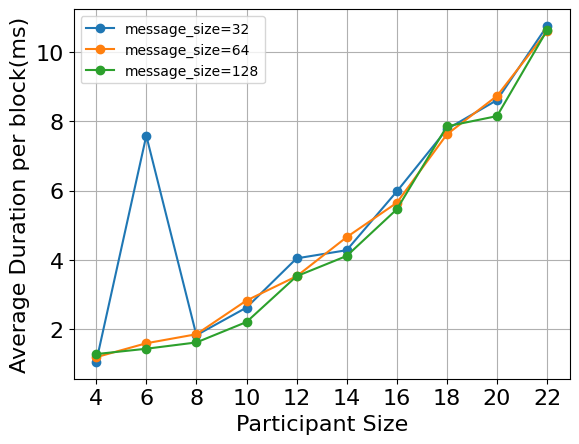

In [7]:
# csvファイルからdurationとlen_block_rangeをとって合計し、一ブロックあたりのdurationを求める
import csv
import matplotlib.pyplot as plt
import numpy as np

min_participant = 4
max_participant = 22
message_size_list = [32, 64, 128] 
participant_size_2list = []
average_duration_2list = []
netwoek_delay = 10

for message_size in message_size_list:
	participant_size_list = []
	average_duration_list = []
	for participant_size in range(min_participant, max_participant + 1):
		result_csv_folder = "./results/n" + str(participant_size) + "/boo" + str(participant_size) + "/m" + str(message_size) + "/d" + str(netwoek_delay) + "/"
		consensus_event_file = result_csv_folder + "consensus_event.csv"
		
		try :
			with open(consensus_event_file, 'r') as file:
				pass
		except FileNotFoundError:
			print("FileNotFoundError: ", consensus_event_file)
			continue
		with open(consensus_event_file, 'r') as file:
			reader = csv.DictReader(file)
			sum_duration = 0
			sum_len_block_range = 0
			num_block = 0
			for row in reader:
				if row["duration"] != "null":
					sum_duration += int(row["duration"])
					num_block += 1
					sum_len_block_range += int(row["len_block_range"])
			
			print("participant_size: ", participant_size)
			print("sum_duration: ", sum_duration)
			print("sum_len_block_range: ", sum_len_block_range)
			print("num_block: ", sum_len_block_range)
			print("average_duration: ", sum_duration / sum_len_block_range)
			# print("average_len_block_range: ", sum_len_block_range / num_block)
			print("")
			participant_size_list.append(participant_size)
			average_duration_list.append(sum_duration / sum_len_block_range)
	participant_size_2list.append(participant_size_list)
	average_duration_2list.append(average_duration_list)




# 折れ線グラフの作成
plt.plot(participant_size_2list[0], average_duration_2list[0], marker='o', linestyle='-', label='message_size=32')
plt.plot(participant_size_2list[1], average_duration_2list[1], marker='o', linestyle='-', label='message_size=64')
plt.plot(participant_size_2list[2], average_duration_2list[2], marker='o', linestyle='-', label='message_size=128')

# グラフのタイトルとラベル設定
# plt.title('Average Duration vs Participant Size')
plt.xlabel('Participant Size', fontsize=16)
plt.ylabel('Average Duration per block(ms)', fontsize=16)

plt.legend()

# 横軸の目盛りを整数に設定
plt.xticks(participant_size_2list[0], fontsize=16)
plt.yticks(fontsize=16)
# グリッド線を表示
plt.grid(True)

# グラフの表示
plt.show()



# # x-alis=booth_size, y-axis=average_duration, make a graph
# # x-alis is int, y-axis is float

# # 折れ線グラフの作成
# plt.plot(participant_size_list, average_duration_list, marker='o', linestyle='-')

# # グラフのタイトルとラベル設定
# plt.title('Average Duration vs Participant Size')
# plt.xlabel('Participant Size')
# plt.ylabel('Average Duration per block(ms)')

# # 横軸の目盛りを整数に設定
# plt.xticks(participant_size_list)

# # グリッド線を表示
# plt.grid(True)

# # グラフの表示
# plt.show()

booth_size:  4
sum_duration:  28653
sum_len_block_range:  10000
num_block:  10000
average_duration:  2.8653

FileNotFoundError:  ./results/n12/boo5/consensus_event.csv
booth_size:  6
sum_duration:  46131
sum_len_block_range:  9654
num_block:  9654
average_duration:  4.778433809819764

FileNotFoundError:  ./results/n12/boo7/consensus_event.csv
booth_size:  8
sum_duration:  51636
sum_len_block_range:  9423
num_block:  9423
average_duration:  5.479783508436803

FileNotFoundError:  ./results/n12/boo9/consensus_event.csv
booth_size:  10
sum_duration:  75146
sum_len_block_range:  9473
num_block:  9473
average_duration:  7.932650691438826

FileNotFoundError:  ./results/n12/boo11/consensus_event.csv
booth_size:  12
sum_duration:  90658
sum_len_block_range:  8579
num_block:  8579
average_duration:  10.567432101643549



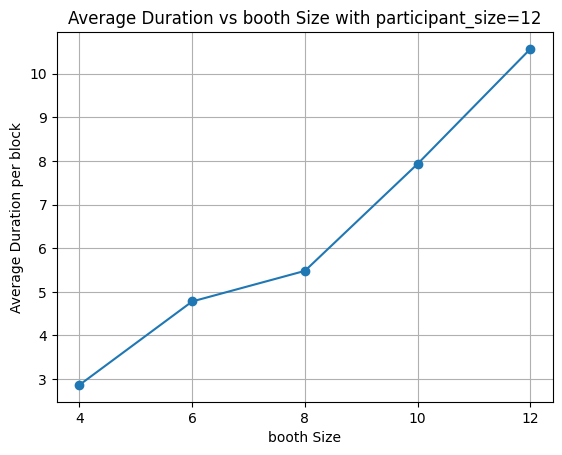

In [13]:
# csvファイルからdurationとlen_block_rangeをとって合計し、一ブロックあたりのdurationを求める
import matplotlib.pyplot as plt
import numpy as np

participant_size = 12
min_booth_size = 4
max_booth_size = 12
booth_size_list = []
average_duration_list = []

for booth_size in range(min_booth_size, max_booth_size + 1):
	result_csv_folder = "./results/n" + str(participant_size) + "/" + "boo"  + str(booth_size) + "/"
	consensus_event_file = result_csv_folder + "consensus_event.csv"
	
	try :
		with open(consensus_event_file, 'r') as file:
			pass
	except FileNotFoundError:
		print("FileNotFoundError: ", consensus_event_file)
		continue
	with open(consensus_event_file, 'r') as file:
		reader = csv.DictReader(file)
		sum_duration = 0
		sum_len_block_range = 0
		num_block = 0
		for row in reader:
			if row["duration"] != "null":
				sum_duration += int(row["duration"])
				num_block += 1
				sum_len_block_range += int(row["len_block_range"])
		
		print("booth_size: ", booth_size)
		print("sum_duration: ", sum_duration)
		print("sum_len_block_range: ", sum_len_block_range)
		print("num_block: ", sum_len_block_range)
		print("average_duration: ", sum_duration / sum_len_block_range)
		# print("average_len_block_range: ", sum_len_block_range / num_block)
		print("")
		booth_size_list.append(booth_size)
		average_duration_list.append(sum_duration / sum_len_block_range)

# x-alis=booth_size, y-axis=average_duration, make a graph
# x-alis is int, y-axis is float

# 折れ線グラフの作成
plt.plot(booth_size_list, average_duration_list, marker='o', linestyle='-')

# グラフのタイトルとラベル設定
# plt.title('Average Duration vs booth Size with participant_size=12')
plt.xlabel('booth Size')
plt.ylabel('Average Duration per block(ms)')

# 横軸の目盛りを整数に設定
plt.xticks(booth_size_list)

# グリッド線を表示
plt.grid(True)

# グラフの表示
plt.show()

Booth Change Version Statics

participant_size:  310
sum_duration:  761750
sum_len_block_range:  6797
num_block:  6797
average_duration:  112.0715021332941
average_block_len:  13.62124248496994
average_consensus_duration:  1526.5531062124248

participant_size:  310
sum_duration:  523727
sum_len_block_range:  8331
num_block:  8331
average_duration:  62.86484215580362
average_block_len:  19.28472222222222
average_consensus_duration:  1212.3310185185185

participant_size:  310
sum_duration:  270024
sum_len_block_range:  8303
num_block:  8303
average_duration:  32.52125737685174
average_block_len:  26.44267515923567
average_consensus_duration:  859.9490445859873

participant_size:  310
sum_duration:  250276
sum_len_block_range:  8415
num_block:  8415
average_duration:  29.741651812240047
average_block_len:  31.051660516605168
average_consensus_duration:  923.5276752767528

participant_size:  310
sum_duration:  179221
sum_len_block_range:  8276
num_block:  8276
average_duration:  21.6555099081682
average_block_len:  39.

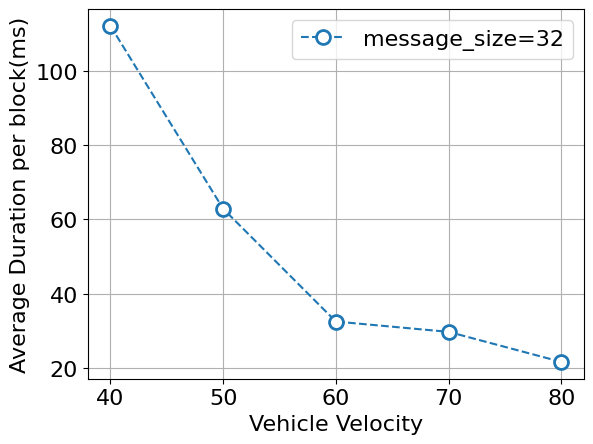

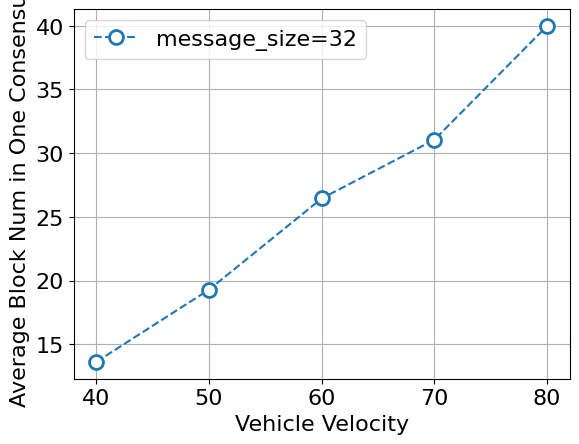

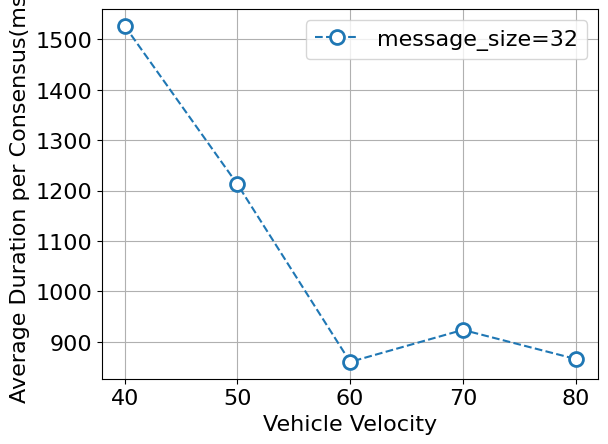

In [11]:
# csvファイルからdurationとlen_block_rangeをとって合計し、一ブロックあたりのdurationを求める
import csv
import matplotlib.pyplot as plt
import numpy as np

participant_size = 310
message_size = 32
average_duration_list = []
netwoek_delay = 10
vehicle_speed_list = [40, 50, 60, 70, 80]


average_duration_list = []
average_block_len_list = []
average_consensus_duration_list = []
for vehicle_speed in vehicle_speed_list:
    result_csv_folder = "./results/booth_change/vs" + str(vehicle_speed) + "/n" + str(participant_size) + "/m" + str(message_size) + "/d" + str(netwoek_delay) + "/"
    consensus_event_file = result_csv_folder + "consensus_event.csv"
    
    try :
        with open(consensus_event_file, 'r') as file:
            pass
    except FileNotFoundError:
        print("FileNotFoundError: ", consensus_event_file)
        continue
    with open(consensus_event_file, 'r') as file:
        reader = csv.DictReader(file)
        sum_duration = 0
        sum_len_block_range = 0
        num_block = 0
        for row in reader:
            if row["duration"] != "null":
                sum_duration += int(row["duration"])
                num_block += 1
                sum_len_block_range += int(row["len_block_range"])
        
        print("participant_size: ", participant_size)
        print("sum_duration: ", sum_duration)
        print("sum_len_block_range: ", sum_len_block_range)
        print("num_block: ", sum_len_block_range)
        print("average_duration: ", sum_duration / sum_len_block_range)
        print("average_block_len: ", sum_len_block_range / num_block)
        print("average_consensus_duration: ", sum_duration  / num_block)
        # print("average_len_block_range: ", sum_len_block_range / num_block)
        print("")
        average_duration_list.append(sum_duration / sum_len_block_range)
        average_block_len_list.append(sum_len_block_range / num_block)
        average_consensus_duration_list.append(sum_duration / num_block)


##Average Duration
# 折れ線グラフの作成
plt.plot(vehicle_speed_list, average_duration_list, marker='o', markersize=10, markerfacecolor="white", markeredgewidth=2, linestyle='--', label='message_size=32')
# グラフのタイトルとラベル設定
# plt.title('Average Duration vs Participant Size')
plt.xlabel('Vehicle Velocity', fontsize=16)
plt.ylabel('Average Duration per block(ms)', fontsize=16)
plt.legend(fontsize=16)
# 横軸の目盛りを整数に設定
plt.xticks(vehicle_speed_list, fontsize=16)
plt.yticks(fontsize=16)
# グリッド線を表示
plt.grid(True)
# グラフの表示
plt.show()

## Average Block Num in One Consensus
# 折れ線グラフの作成
plt.plot(vehicle_speed_list, average_block_len_list, marker='o', markersize=10, markerfacecolor="white", markeredgewidth=2, linestyle='--', label='message_size=32')
# グラフのタイトルとラベル設定
# plt.title('Average Duration vs Participant Size')
plt.xlabel('Vehicle Velocity', fontsize=16)
plt.ylabel('Average Block Num in One Consensus', fontsize=16)
plt.legend(fontsize=16)
# 横軸の目盛りを整数に設定
plt.xticks(vehicle_speed_list, fontsize=16)
plt.yticks(fontsize=16)
# グリッド線を表示
plt.grid(True)
# グラフの表示
plt.show()

# 折れ線グラフの作成
plt.plot(vehicle_speed_list, average_consensus_duration_list, marker='o', markersize=10, markerfacecolor="white", markeredgewidth=2, linestyle='--', label='message_size=32')
# グラフのタイトルとラベル設定
# plt.title('Average Duration vs Participant Size')
plt.xlabel('Vehicle Velocity', fontsize=16)
plt.ylabel('Average Duration per Consensus(ms)', fontsize=16)
plt.legend(fontsize=16)
# 横軸の目盛りを整数に設定
plt.xticks(vehicle_speed_list, fontsize=16)
plt.yticks(fontsize=16)
# グリッド線を表示
plt.grid(True)
# グラフの表示
plt.show()



# # x-alis=booth_size, y-axis=average_duration, make a graph
# # x-alis is int, y-axis is float

# # 折れ線グラフの作成
# plt.plot(participant_size_list, average_duration_list, marker='o', linestyle='-')

# # グラフのタイトルとラベル設定
# plt.title('Average Duration vs Participant Size')
# plt.xlabel('Participant Size')
# plt.ylabel('Average Duration per block(ms)')

# # 横軸の目盛りを整数に設定
# plt.xticks(participant_size_list)

# # グリッド線を表示
# plt.grid(True)

# # グラフの表示
# plt.show()